### Question 2: Museum Site Planning

In [4]:
# Import JuMP, LinearAlgebra and a solver of your choice
using JuMP
using GLPK
using LinearAlgebra

In [41]:
function Museumsiteplanning1(A, b)

    #=
    
    The hyperplane of the polyhedron is A*x=b, (You should consider this form to insert A, x and b in your code)
    
    A: Each row is a row vector, which is the normal vector to the hyperplane (pointing outwards).
    b: Parameter of the hyperplane of the site given in the figure. 
       It should be the parameter of the given poyhedron (shown in the figure), otherwise you will not pass the hidden test!

    r: Radius of the museum
    x: Center of the museum, a vector
    m: JuMP Model
    
    Returns: value of x and r
    =#

# YOUR CODE HERE

    m = Model(GLPK.Optimizer)

    # Decision variables
    @variable(m, r ≥ 0)  # Radius non-negative
    @variable(m, x[1:2]) # Center of the museum

    # Adding constraints
    #@constraint(m, [i=1:size(A,1)], dot(A[i, :], x) + r ≤ b[i] - 50)  #Clearance of 50ft
    for i in 1:size(A,1)
        @constraint(m, A[i,:]'*x + r*norm(A[i,:]) <= b[i])
    end

    # Objective function
    @objective(m, Max, r)

    optimize!(m)
    
    return value.(x),value.(r)
end


Museumsiteplanning1 (generic function with 1 method)

In [42]:
A1 = [
    -5  1   # y ≤ 5x - 250
    0  -1   # y ≥ 50 
    1   0   # x ≤ 450 
    0  1   # Y ≤ 450 
]    # each row vector is the normal vector to the hyperplane (pointing outwards). 
b1 = [ -250, -50, 450, 450]  # Parameter of the hyperplane of the site given in the figure, otherwise you will not pass the hidden test!
# Obtain solution
xopt1,ropt1 = Museumsiteplanning1(A1,b1)
println()
println("radius of museum is: ", ropt1)
println("location of center is: ",xopt1)
println()


radius of museum is: 175.6911948494069
location of center is: [274.30880515059295, 225.6911948494069]



In [48]:
function Museumsiteplanning2(A, b)

    #=
    
    The hyperplane of the polyhedron is A*x=b, (You should consider this form to insert A, x and b in your code)
    
    A: Each row is a row vector, which is the normal vector to the hyperplane (pointing outwards).
    b: Parameter of the hyperplane of the site given in the figure. 
       It should be the parameter of the given poyhedron (shown in the figure), otherwise you will not pass the hidden test!

    r: Radius of the museum
    x: Center of the museum, a vector
    m: JuMP Model
    
    Returns: value of x and r
    =#

# YOUR CODE HERE

    m = Model(GLPK.Optimizer)

    # Decision variables
    @variable(m, r ≥ 0)  # Radius non-negative
    @variable(m, x[1:2]) # Center of the museum

    # Adding constraints
    #@constraint(m, [i=1:size(A,1)], dot(A[i, :], x) + r ≤ b[i] - 50)  #Clearance of 50ft
    for i in 1:size(A,1)
        @constraint(m, A[i,:]'*x + r*norm(A[i,:]) <= b[i] -50)
    end

    # Objective function
    @objective(m, Max, r)

    optimize!(m)
    
    return value.(x),value.(r)
end


Museumsiteplanning2 (generic function with 1 method)

In [49]:
# Site 2 

A2 = [
    0   1   # y ≤ 500
   -1   0   # x ≥ 0  (rewritten as -x ≤ 0)
   -2/3  1  # y ≤ (2/3)x + 1500 (rewritten as -2/3 * x + y ≤ 1500)
   -3   1   # y ≥ 3x - 1500 (rewritten as -3x + y ≥ -1500 → -3x + y ≤ 1500)
    0  -1   # y ≥ 0  (rewritten as -y ≤ 0)
]

b2 = [500, 0, 1500, 1500, 0]

# Obtain solution
xopt2,ropt2 = Museumsiteplanning2(A2,b2)
println()
println("radius of museum is: ", ropt2)
println("location of center is: ",xopt2)
println()


radius of museum is: 200.0
location of center is: [250.0, 250.0]



In [9]:
import Pkg;
Pkg.add("PyPlot")
using PyPlot

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


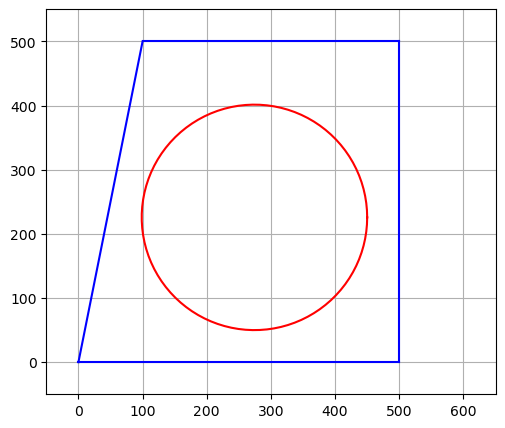

In [50]:
# Defining a function to plot the outline of the museum area
function plot_site(mode)
    plot([0,500], [0,0], "b-")
    plot([0,100], [0,500], "b-")
    plot([100,500], [500,500],"b-")
    plot([500,500], [0,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end

figure(figsize=(6,5))
#plot_site(1)

figure(figsize=(6,5))
|
θ = range(0,stop=2*pi,length=100)
plot(xopt1[1] .+ ropt1*cos.(θ), xopt1[2] .+ ropt1*sin.(θ), "r-")

plot_site(1)

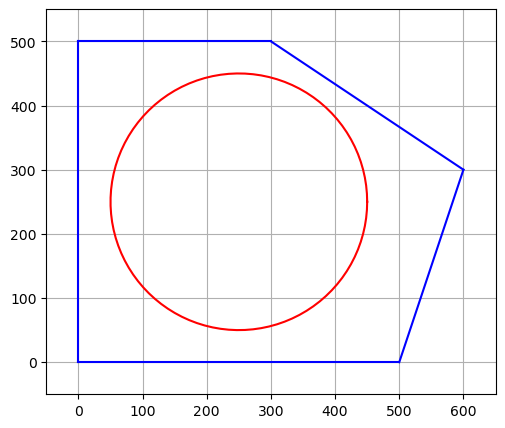

In [51]:
# Defining a function to plot the outline of the museum area
function plot_site(mode)
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end

figure(figsize=(6,5))

θ = range(0,stop=2*pi,length=100)
plot(xopt2[1] .+ ropt2*cos.(θ), xopt2[2] .+ ropt2*sin.(θ), "r-")

plot_site(0)

### ***Site 2 can accommodate a larger museum since its optimal radius is greater than Site 1's radius***